Zu den Graphen mit den Sprachen und der Zufriedenheit:
- Sprachen die selten vorkommen raus nehmen oder nur top ... anzeigen ?
  (mehr infos in den Kommentaren)
- Darstellung in 3 Graphen oder einem ?

Ist das das Ende oder sollen wir noch was mit den anderen Features machen?

PS: wenn was nicht ausgeführt werden kann oder angezeigt wird Prüfen ob alle benutzten Module aktuell sind (pip list --outdated)



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly
import plotly.plotly as py
import networkx as nx
from sklearn.preprocessing import MinMaxScaler

In [2]:
d = pd.read_csv("datensatz_V2.csv")

In [3]:
df = d.loc[:,['JobSatisfaction','FormalEducation']]
lang = pd.read_csv('LanguagesWorkedWith.csv')
age = pd.read_csv('age.csv')

In [4]:
#Entfernt sprachen, die von weniger als 10% der befragten beherrscht werden
#ist vlt sinnvoll, da der Graph sonst eher unübersichtlich wird, außerdem haben Sprachen, 
#die am seltensten vorkommen oft die höchsten werte
#Alternativ in den Graphen nur die top 10-20 sprachen anzeigen
for col in lang.columns:
    if lang[col].mean() < 0.1:
        lang.drop(columns=col, inplace=True)
#Beibehaltene Sprachen
lang.columns

Index(['JavaScript', 'Python', 'Bash/Shell', 'C', 'C++', 'Java', 'SQL',
       'TypeScript', 'HTML', 'CSS', 'Ruby', 'PHP', 'C#'],
      dtype='object')

In [9]:
#Schritt für Schritt berechnet 
#abschluss 
fe_y = df[df.FormalEducation == 'yes']
#satisfied
#DataFrame in dem alle einträge satisfied und mit abschluss sind 
satyes = fe_y[fe_y.JobSatisfaction == 'satisfied']
# Wahrscheinlichkeit Abschluss zu haben und zufrieden zu sein P(mit Abschluss | satisfied)
sat1 = len(satyes)/(d.JobSatisfaction.value_counts()['satisfied'])
# Wahrscheinlichkeit zufrieden zu sein P (satisfied)
sat2 = d.JobSatisfaction.value_counts()['satisfied']/len(d)
# Wahrscheinlichkeit Abschluss zu haben
sat3 = d.FormalEducation.value_counts()['yes']/len(d)
# Wahrscheinlichkeit mit abschluss zufrieden zu sein P (satisfied | mit Abschluss)
psat = sat1*sat2/sat3
#neither
neiyes = fe_y[fe_y.JobSatisfaction == 'neither satisfied nor dissatisfied']
nei1 = len(neiyes) / d.JobSatisfaction.value_counts()['neither satisfied nor dissatisfied']
nei2 = d.JobSatisfaction.value_counts()['neither satisfied nor dissatisfied']/len(d)
nei3 = sat3
pnei = nei1 * nei2 / nei3
#dissatisfied
disyes = fe_y[fe_y.JobSatisfaction == 'dissatisfied']
dis1 = len(disyes) / d.JobSatisfaction.value_counts()['dissatisfied']
dis2 = d.JobSatisfaction.value_counts()['dissatisfied'] / len(d)
dis3 = sat3
pdis = dis1 * dis2 / dis3
#df erstellen 
feyes = pd.DataFrame(index=['satisfied','neither satisfied nor dissatisfied', 'dissatisfied' ], 
                     columns=fe_y.FormalEducation.unique(),data=[psat, pnei, pdis])

In [10]:
"""
P (satisfaction | feature) = P(feature | satisfaction)
                            *P(satisfaction)
                            /P(feature)
                            
P (satisfaction | feature) = Anzahl von Feature in Satisfaction / Anzahl Satisfaction 
                            (z.B. Anzahl von Leuten mit Abschluss in satisfied / Anzahl der Leute die satisfied sind)
                            * Anzahl Satisfaction / Anzahl der Befragten
                            / Anzahl Feature / Anzahl der Befragten
                            
                            
P (satisfaction | feature) = len(df(sat&feature)) / len(df(sat))
                            *len(df(sat))/len(df)
                            /len(df(feature))/len(df)
    
bei unabhängigkeit P (A|B) = P(A)
bzw P (satisfaction | feature) = P(satisfaction)
                
"""

'\nP (satisfaction | feature) = P(feature | satisfaction)\n                            *P(satisfaction)\n                            /P(feature)\n                            \nP (satisfaction | feature) = Anzahl von Feature in Satisfaction / Anzahl Satisfaction \n                            (z.B. Anzahl von Leuten mit Abschluss in satisfied / Anzahl der Leute die satisfied sind)\n                            * Anzahl Satisfaction / Anzahl der Befragten\n                            / Anzahl Feature / Anzahl der Befragten\n                            \n                            \nP (satisfaction | feature) = len(df(sat&feature)) / len(df(sat))\n                            *len(df(sat))/len(df)\n                            /len(df(feature))/len(df)\n    \nbei unabhängigkeit P (A|B) = P(A)\nbzw P (satisfaction | feature) = P(satisfaction)\n                \n'

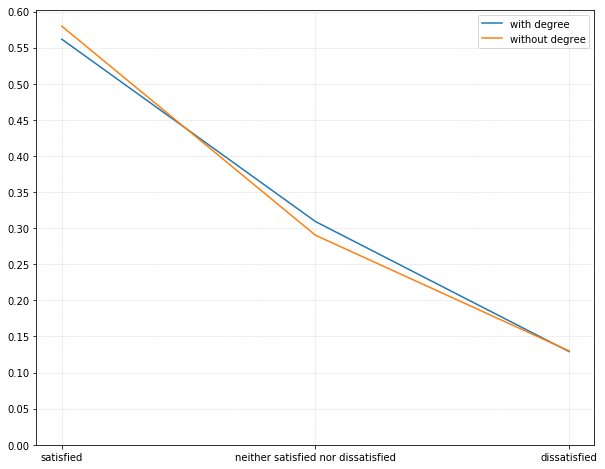

In [11]:
#kein abschluss 
fe_n = df[df.FormalEducation == 'no']
#satisfied
satno = fe_n[fe_n.JobSatisfaction == 'satisfied']
sat1 = len(satno) / d.JobSatisfaction.value_counts()['satisfied']
sat2 = d.JobSatisfaction.value_counts()['satisfied']/len(d)
sat3 = d.FormalEducation.value_counts()['no']/len(d)
psat = sat1 * sat2 / sat3
#neither
neino = fe_n[fe_n.JobSatisfaction == 'neither satisfied nor dissatisfied']
nei1 = len(neino) / d.JobSatisfaction.value_counts()['neither satisfied nor dissatisfied']
nei2 = d.JobSatisfaction.value_counts()['neither satisfied nor dissatisfied']/len(d)
nei3 = sat3
pnei = nei1* nei2 / nei3
#dissatisfied
disno = fe_n[fe_n.JobSatisfaction == 'dissatisfied']
dis1 = len(disno)/ d.JobSatisfaction.value_counts()['dissatisfied']
dis2 = d.JobSatisfaction.value_counts()['dissatisfied'] / len(d)
dis3 = sat3
pdis = dis1 * dis2 / dis3
#df erstellen 
feno = pd.DataFrame(index=['satisfied','neither satisfied nor dissatisfied', 'dissatisfied' ],
                   columns=fe_n.FormalEducation.unique(), data=[psat, pnei, pdis])
# Dataframes von mit und ohne Abschluss verbinden
data_fe = feyes.join(feno)
# Umbenennen der Spalten
data_fe.columns=['with degree', 'without degree']

# Graph erstellen 
plt.plot(data_fe)
plt.legend(data_fe.columns)
plt.grid(linestyle=":", linewidth=0.5);
plt.yticks(np.arange(0,0.65, 0.05))
fig = plt.gcf()
fig.set_size_inches(10,8)

In [12]:
data_fe

with degree  without degree
satisfied                              0.561705        0.579747
neither satisfied nor dissatisfied     0.309229        0.290253
dissatisfied                           0.129065        0.130000

In [13]:
# Im Grunde das gleiche wie oben nur diesmal als Funktion,
# außerdem Berechnung für Feature vorhanden und Feature nicht vorhanden
# Berechnet Wahrscheinlichkeit in der sich die Features des übergebenen Datensatzes auf Zufriedenheit
# auswirken 
df_sat = d.JobSatisfaction[d.JobSatisfaction == 'satisfied']
psat = len(df_sat) / len(d)

df_nei = d.JobSatisfaction[d.JobSatisfaction == 'neither satisfied nor dissatisfied']
pnei = len(df_nei) / len(d)

df_dis = d.JobSatisfaction[d.JobSatisfaction == 'dissatisfied']
pdis = len(df_dis) / len(d)

def probability(df_parameter):
    
    #Verbindet den übergebenen DAtaFrame mit der Zufriedenheit 
    feature_sat = df_parameter.join(df_sat, how='right')

    feature_nei = df_parameter.join(df_nei, how='right')

    feature_dis = df_parameter.join(df_dis, how='right')
    
    tmp = pd.DataFrame(index=['satisfied', 'neither', 'dissatisfied'])  
    #loop durch alle Features
    for col in df_parameter.columns:
        #Die ganze Berechnung einmal für feature vorhanden und feature nicht vorhanden
        for val in [1,0]:
            #Berechnung der Wahrscheinlichkeit wenn Sprache beherrscht wird 
            #für satisfied
            p_s = feature_sat[col].value_counts()[val] / d.JobSatisfaction.value_counts()['satisfied']
            p_s = p_s * psat
            p_s = p_s / (df_parameter[col].value_counts()[val] / len(d))
            #für neither...
            p_n = feature_nei[col].value_counts()[val] /  d.JobSatisfaction \
                                            .value_counts()['neither satisfied nor dissatisfied']
            p_n = p_n * pnei
            p_n = p_n / (df_parameter[col].value_counts()[val] / len(d))

            #für dissatisfied
            p_d = feature_dis[col].value_counts()[val] / d.JobSatisfaction.value_counts()['dissatisfied']
            p_d = p_d * pdis
            p_d = p_d / (df_parameter[col].value_counts()[val] / len(d))
            
            #Ergebnis in DataFrame einfgügen
            if val == 0: tmp[col+'_no'] = [p_s, p_n, p_d]
            elif val == 1: tmp[col+'_yes'] = [p_s, p_n, p_d]
            p_s = 0
            p_n = 0
            p_d = 0
            
    return tmp        

In [14]:
#Erstellt DataFrames mit der Wahrscheinlichkeit dass man, wenn man eine Sprache beherrscht / 
#nicht beherrscht zufrieden ... unzufrieden wird 
data = probability(lang)
sat_links = data.sort_values(by='satisfied', axis=1, ascending=False).stack().reset_index()
sat_links.columns = ['satisfaction', 'language', 'pct']
sat_links = sat_links[sat_links.satisfaction == 'satisfied']

nei_links = data.sort_values(by='neither', axis=1, ascending=False)\
.stack().reset_index()
nei_links.columns = ['satisfaction', 'language', 'pct']
nei_links=nei_links[nei_links.satisfaction == 'neither']

dis_links = data.sort_values(by='dissatisfied', axis=1, ascending=False).stack().reset_index()
dis_links.columns = ['satisfaction', 'language', 'pct']
dis_links = dis_links[dis_links.satisfaction == 'dissatisfied']

c:\python\python36-32\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning:

isinstance(..., numbers.Number)



satisfaction        language       pct
0     satisfied        Ruby_yes  0.609284
1     satisfied  Bash/Shell_yes  0.590493
2     satisfied  TypeScript_yes  0.587179
3     satisfied      Python_yes  0.581251
4     satisfied         Java_no  0.575850
5     satisfied          C#_yes  0.571136
6     satisfied          PHP_no  0.570635
7     satisfied  JavaScript_yes  0.570058
8     satisfied         CSS_yes  0.569196
9     satisfied        HTML_yes  0.568653
10    satisfied            C_no  0.566725
11    satisfied          C++_no  0.565877
12    satisfied          SQL_no  0.565877
13    satisfied         SQL_yes  0.565337
14    satisfied         C++_yes  0.564361

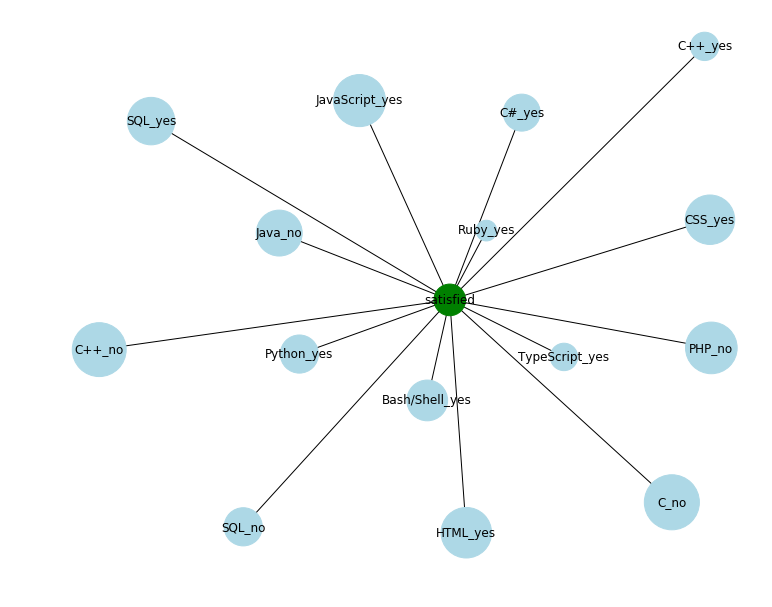

In [15]:
#Auswahl wv Elemente dargestellt werden sollen:
sat_links = sat_links[:15]

# Erstellt Graphen, Parameter: DataFrame, verbindung von, verbindung nach
S = nx.from_pandas_edgelist(sat_links, 'satisfaction', 'language');
#Farben festlegen
color_map = [];
for node in S:
    if node == 'satisfied':
        color_map.append('green')
    else: color_map.append('lightblue')
#Größe der Nodes anhang der häufigkeit in der die Sprache benutzt wird festlegen
#Fester (frei ausgedachter) Wert für Satisfied
size_map = [];
for node in S:
    if node == 'satisfied':
        size_map.append(1000)
    else: 
        language = node.split('_') #entfernt _yes und _no 
        size = lang[language[0]].value_counts()[1]
        if language[1] == 'no':
            size = len(lang) - size
        size_map.append(size/10)
        
#Kantenlänge anhand der Wahrscheinlichkeit, dass man mit Sprache x Zufrieden wird 
tmp = sat_links.drop(columns='satisfaction').set_index('language');
#werte normalisieren

scaler = MinMaxScaler();
scaled_values = scaler.fit_transform(tmp);
tmp.pct = scaled_values;
tmp.pct += 0.1;
tmp = tmp.T;
#Kantenlänge zuweisen 
for u,v,dat in S.edges(data=True):
    dat['weight'] = (tmp[v])*1.5
#Graph zeichnen
nx.draw(S, with_labels=True, node_color=color_map, node_size=size_map);
fig = plt.gcf()
fig.set_size_inches(10,8)
sat_links[:]

In [16]:
#Auswahl wv Elemente dargestellt werden sollen:
nei_links = nei_links[:15]

# Erstellt Graphen, Parameter: DataFrame, verbindung von, verbindung nach
N = nx.from_pandas_edgelist(nei_links, 'satisfaction', 'language');
#Farben festlegen
color_map = [];
for node in N:
    if node == 'neither':
        color_map.append('orange')
    else: color_map.append('lightblue')
#Größe der Nodes anhang der häufigkeit in der die Sprache benutzt wird festlegen
#Fester (frei ausgedachter) Wert für Satisfied
size_map = [];

for node in N:
    if node == 'neither':
        size_map.append(1000)
    else: 
        language = node.split('_') #entfernt _yes und _no 
        size = lang[language[0]].value_counts()[1]
        if language[1] == 'no':
            size = len(lang) - size
        size_map.append(size/10)
        
#Kantenlänge anhand der Wahrscheinlichkeit, dass man mit Sprache x Zufrieden wird 
tmp = nei_links.drop(columns='satisfaction').set_index('language');
#werte normalisieren
scaler = MinMaxScaler();
scaled_values = scaler.fit_transform(tmp);
tmp.pct = scaled_values;
tmp.pct += 0.1;
tmp = tmp.T;
#Kantenlänge zuweisen 
for u,v,dat in N.edges(data=True):
    dat['weight'] = (tmp[v])*1.5
#Graph zeichnen
nx.draw(N, with_labels=True, node_color=color_map, node_size=size_map);
fig = plt.gcf()
fig.set_size_inches(10,8)
nei_links[:]

c:\python\python36-32\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning:

isinstance(..., numbers.Number)



satisfaction       language       pct
26      neither  Bash/Shell_no  0.319809
27      neither       Java_yes  0.319280
28      neither      Python_no  0.314457
29      neither        PHP_yes  0.312985
30      neither          C_yes  0.312796
31      neither        C++_yes  0.312399
32      neither        Ruby_no  0.310228
33      neither  JavaScript_no  0.309837
34      neither  TypeScript_no  0.307307
35      neither        HTML_no  0.306181
36      neither         CSS_no  0.306147
37      neither        SQL_yes  0.305854
38      neither          C#_no  0.305494
39      neither       HTML_yes  0.304736
40      neither        CSS_yes  0.304689

c:\python\python36-32\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning:

isinstance(..., numbers.Number)



satisfaction       language       pct
52  dissatisfied  JavaScript_no  0.136870
53  dissatisfied         CSS_no  0.135353
54  dissatisfied        HTML_no  0.135128
55  dissatisfied  Bash/Shell_no  0.134857
56  dissatisfied        PHP_yes  0.134451
57  dissatisfied  TypeScript_no  0.132645
58  dissatisfied          C#_no  0.132220
59  dissatisfied         C++_no  0.130929
60  dissatisfied      Python_no  0.130111
61  dissatisfied         SQL_no  0.129969
62  dissatisfied        Ruby_no  0.129940
63  dissatisfied           C_no  0.129788
64  dissatisfied        Java_no  0.129675
65  dissatisfied        SQL_yes  0.128809
66  dissatisfied       Java_yes  0.128724

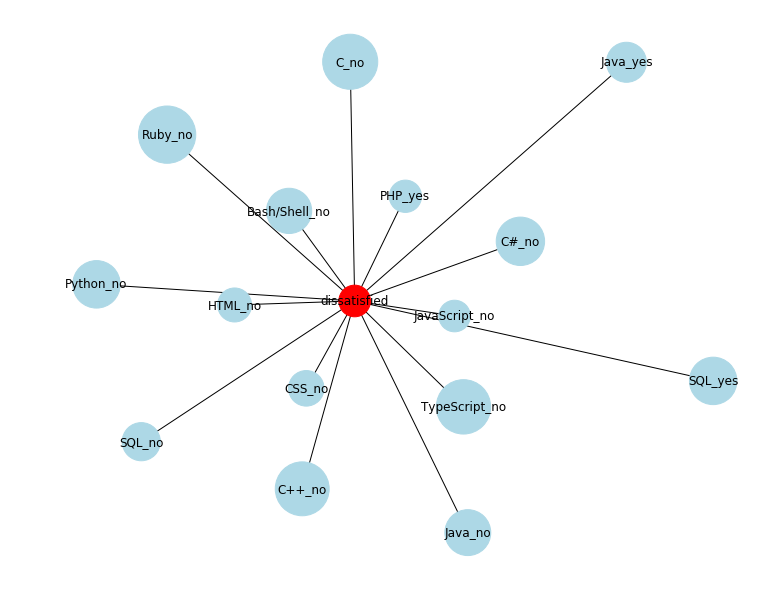

In [17]:
#Auswahl wv Elemente dargestellt werden sollen:
dis_links = dis_links[:15]

# Erstellt Graphen, Parameter: DataFrame, verbindung von, verbindung nach
D = nx.from_pandas_edgelist(dis_links, 'satisfaction', 'language');
#Farben festlegen
color_map = [];
for node in D:
    if node == 'dissatisfied':
        color_map.append('red')
    else: color_map.append('lightblue')
#Größe der Nodes anhang der häufigkeit in der die Sprache benutzt wird festlegen
#Fester (frei ausgedachter) Wert für Satisfied
size_map = [];
for node in D:
    if node == 'dissatisfied':
        size_map.append(1000)
    else: 
        language = node.split('_') #entfernt _yes und _no 
        size = lang[language[0]].value_counts()[1]
        if language[1] == 'no':
            size = len(lang) - size
        size_map.append(size/10)
        
#Kantenlänge anhand der Wahrscheinlichkeit, dass man mit Sprache x Zufrieden wird 
tmp = dis_links.drop(columns='satisfaction').set_index('language');
#werte normalisieren
scaler = MinMaxScaler();
scaled_values = scaler.fit_transform(tmp);
tmp.pct = scaled_values;
tmp.pct += 0.1;
tmp = tmp.T;
#Kantenlänge zuweisen 
for u,v,dat in D.edges(data=True):
    dat['weight'] = (tmp[v])*1.5
#Graph zeichnen
nx.draw(D, with_labels=True, node_color=color_map, node_size=size_map);
fig = plt.gcf()
fig.set_size_inches(10,8)
dis_links[:]

In [18]:
#Erstellen des DF für Zufriedenheit und Unzufriedenheit nach Alter
a = probability(age)
cols = [c for c in a.columns if '_no' in c]
a.drop(columns=cols, inplace=True)

colls = []
for col in a.columns:
    colls.append(col.split('_')[1])
a.columns = colls

age_links = a.sort_values(by='satisfied', axis=1, ascending=False).stack().reset_index()
age_links.columns = ['satisfaction', 'age', 'pct']
age_sat_links = age_links[age_links.satisfaction == 'satisfied']

age_links = a.sort_values(by='dissatisfied', axis=1, ascending=False).stack().reset_index()
age_links.columns = ['satisfaction', 'age', 'pct']
age_dis_links = age_links[age_links.satisfaction == 'dissatisfied']

c:\python\python36-32\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning:

isinstance(..., numbers.Number)



satisfaction                 age       pct
0    satisfied  Under 18 years old  0.745455
1    satisfied   65 years or older  0.720000
2    satisfied   55 - 64 years old  0.621359
3    satisfied   35 - 44 years old  0.591831
4    satisfied   45 - 54 years old  0.591477
5    satisfied   18 - 24 years old  0.569117
6    satisfied   25 - 34 years old  0.551337

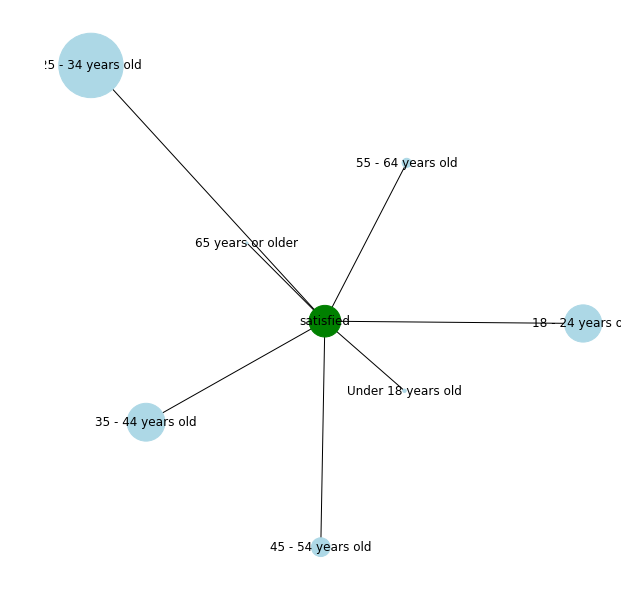

In [19]:
#Graph Zufriedenheit nach Alter 
AS = nx.from_pandas_edgelist(age_sat_links, 'satisfaction', 'age')
#Farben
color_map = []
for node in AS:
    if node == 'satisfied': color_map.append('green')
    else: color_map.append('lightblue')

#Nodegröße
size_map = []
for node in AS:
    if node == 'satisfied': size_map.append(1000)
    else:
        alter = node.split('_yes')[0]
        size_map.append(age['Age_'+alter].value_counts()[1]/5)

#werte normalisieren
tmp = age_sat_links.drop(columns='satisfaction').set_index('age');
scaler = MinMaxScaler();
scaled_values = scaler.fit_transform(tmp);
tmp.pct = scaled_values;
tmp.pct += 0.1;
tmp = tmp.T;

#Kantenlänge
for u,v,dat in AS.edges(data=True):
    dat['weight'] = (tmp[v])*1.5

#Zeichnen
nx.draw(AS, with_labels=True, node_color=color_map, node_size=size_map)
fig = plt.gcf()
fig.set_size_inches(8,8)
age_sat_links


In [20]:
#Graph Zufriedenheit nach Alter 
AD = nx.from_pandas_edgelist(age_dis_links, 'satisfaction', 'age')
#Farben
color_map = []
for node in AD:
    if node == 'dissatisfied': color_map.append('red')
    else: color_map.append('lightblue')
        
#Nodegröße
size_map = []
for node in AD:
    if node == 'dissatisfied': size_map.append(1000)
    else:
        alter = node.split('_yes')[0]
        size_map.append(age['Age_'+alter].value_counts()[1]/5)

#werte normalisieren
tmp = age_dis_links.drop(columns='satisfaction').set_index('age');
scaler = MinMaxScaler();
scaled_values = scaler.fit_transform(tmp);
tmp.pct = scaled_values;
tmp.pct += 0.1;
tmp = tmp.T;

#Kantenlänge
for u,v,dat in AD.edges(data=True):
    dat['weight'] = (tmp[v])*1.5


    
#Zeichnen
nx.draw(AD, with_labels=True, node_color=color_map, node_size=size_map)
fig = plt.gcf()
fig.set_size_inches(8,8)
age_dis_links


c:\python\python36-32\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning:

isinstance(..., numbers.Number)



satisfaction                 age       pct
14  dissatisfied   45 - 54 years old  0.169318
15  dissatisfied   55 - 64 years old  0.138350
16  dissatisfied   35 - 44 years old  0.134844
17  dissatisfied   25 - 34 years old  0.129800
18  dissatisfied   65 years or older  0.120000
19  dissatisfied   18 - 24 years old  0.111801
20  dissatisfied  Under 18 years old  0.054545

In [21]:
#Erstelle DF für Zufriedenheit nach Unternehmensgröße
cs = pd.read_csv('companysize.csv')
cs_data = probability(cs)

colls = []
for col in cs_data.columns:
    colls.append(col.split('_')[1]+'_'+col.split('_')[2])
cs_data.columns = colls

cs_sat_links = cs_data.sort_values(by='satisfied', axis=1, ascending=False).stack().reset_index()
cs_sat_links.columns = ['satisfaction', 'company_size', 'pct']
cs_sat_links = cs_sat_links[cs_sat_links.satisfaction == 'satisfied']

cs_dis_links = cs_data.sort_values(by='dissatisfied', axis=1, ascending=False).stack().reset_index()
cs_dis_links.columns = ['satisfaction', 'company_size', 'pct']
cs_dis_links = cs_dis_links[cs_dis_links.satisfaction == 'dissatisfied']

In [22]:
cs_sat_links

satisfaction                  company_size       pct
0     satisfied        20 to 99 employees_yes  0.573255
1     satisfied      100 to 499 employees_yes  0.569819
2     satisfied   10,000 or more employees_no  0.568724
3     satisfied      500 to 999 employees_yes  0.568676
4     satisfied   Fewer than 10 employees_yes  0.568240
5     satisfied   5,000 to 9,999 employees_no  0.565744
6     satisfied         10 to 19 employees_no  0.565702
7     satisfied   1,000 to 4,999 employees_no  0.565671
8     satisfied       500 to 999 employees_no  0.565329
9     satisfied    Fewer than 10 employees_no  0.565265
10    satisfied  1,000 to 4,999 employees_yes  0.564568
11    satisfied       100 to 499 employees_no  0.564475
12    satisfied        10 to 19 employees_yes  0.564247
13    satisfied         20 to 99 employees_no  0.563137
14    satisfied  5,000 to 9,999 employees_yes  0.561205
15    satisfied  10,000 or more employees_yes  0.546236

c:\python\python36-32\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning:

isinstance(..., numbers.Number)



satisfaction                 company_size       pct
0    satisfied       20 to 99 employees_yes  0.573255
1    satisfied     100 to 499 employees_yes  0.569819
2    satisfied  10,000 or more employees_no  0.568724
3    satisfied     500 to 999 employees_yes  0.568676
4    satisfied  Fewer than 10 employees_yes  0.568240
5    satisfied  5,000 to 9,999 employees_no  0.565744
6    satisfied        10 to 19 employees_no  0.565702
7    satisfied  1,000 to 4,999 employees_no  0.565671

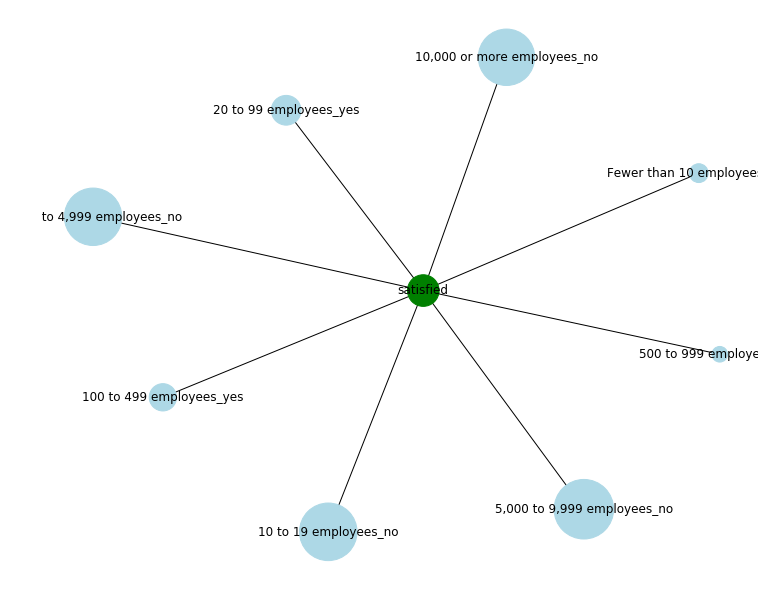

In [23]:
#Graph Zufriedenheit - Company size
#nimmt nur die hälfte des datensatzes, um jede größe nur einmal zu haben
#sont wäre jede größe einmal mit _yes und einmal mit _no
CS = nx.from_pandas_edgelist(cs_sat_links[:8], 'satisfaction', 'company_size')

#Farben festlegen
color_map = []
for node in CS:
    if node == 'satisfied': color_map.append("green")
    else: color_map.append('lightblue')

#node größe 
size_map = []
for node in CS:
    if node == 'satisfied': size_map.append(1000)
    else:
        csize = node.split('_')[0]
        size = cs['CompanySize_'+csize].value_counts()[1]
        if node.split('_')[1] == 'no':
            size = len(cs) - size
        size_map.append(size/10)

#Katenlänge
tmp = cs_sat_links.drop(columns='satisfaction').set_index('company_size');
scaler = MinMaxScaler();
scaled_values = scaler.fit_transform(tmp);
tmp.pct = scaled_values;
tmp.pct += 0.1;
tmp = tmp.T;

for u, v, dat in CS.edges(data=True):
    dat['weight'] = (tmp[v])*1.5
      

nx.draw(CS, with_labels=True, node_size = size_map, node_color = color_map)
fig = plt.gcf()
fig.set_size_inches(10,8)
cs_sat_links[:8]

c:\python\python36-32\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning:

isinstance(..., numbers.Number)



satisfaction                  company_size       pct
32  dissatisfied  10,000 or more employees_yes  0.144058
33  dissatisfied      500 to 999 employees_yes  0.135711
34  dissatisfied        10 to 19 employees_yes  0.134650
35  dissatisfied   Fewer than 10 employees_yes  0.133088
36  dissatisfied       100 to 499 employees_no  0.131177
37  dissatisfied         20 to 99 employees_no  0.130843
38  dissatisfied   1,000 to 4,999 employees_no  0.130068
39  dissatisfied  5,000 to 9,999 employees_yes  0.129316

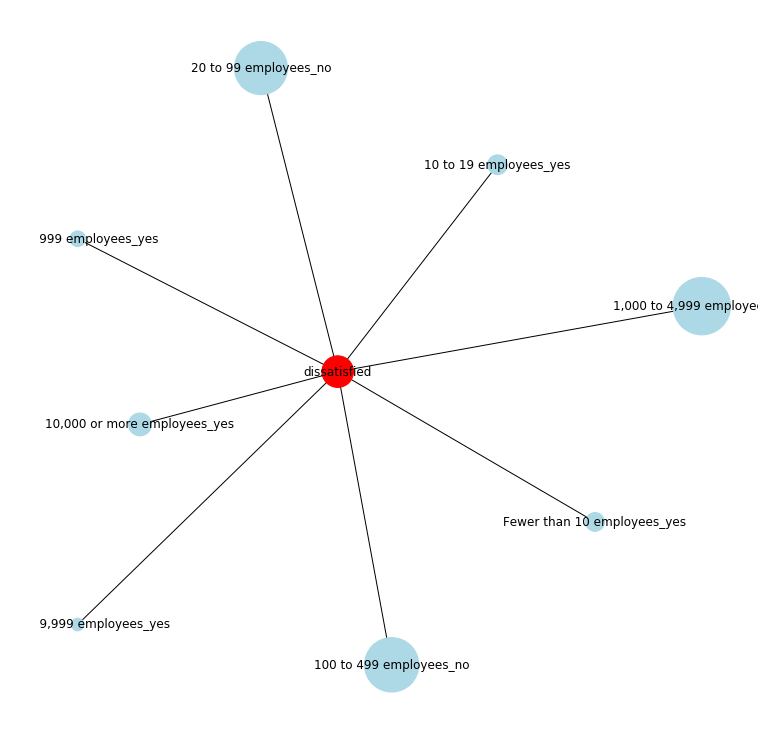

In [34]:
#Graph Unzufriedenheit - Company size
#nimmt nur die hälfte des datensatzes, um jede größe nur einmal zu haben
#sont wäre jede größe einmal mit _yes und einmal mit _no
CD = nx.from_pandas_edgelist(cs_dis_links[:8], 'satisfaction', 'company_size')

#Farben festlegen
color_map = []
for node in CD:
    if node == 'dissatisfied': color_map.append("red")
    else: color_map.append('lightblue')

#node größe 
size_map = []
for node in CD:
    if node == 'dissatisfied': size_map.append(1000)
    else:
        csize = node.split('_')[0]
        size = cs['CompanySize_'+csize].value_counts()[1]
        if node.split('_')[1] == 'no':
            size = len(cs) - size
        size_map.append(size/10)

#Katenlänge
tmp = cs_dis_links.drop(columns='satisfaction').set_index('company_size');
scaler = MinMaxScaler();
scaled_values = scaler.fit_transform(tmp);
tmp.pct = scaled_values;
tmp.pct += 0.1;
tmp = tmp.T;

for u, v, dat in CD.edges(data=True):
    dat['weight'] = (tmp[v])*1.5
    
nx.draw(CD, with_labels=True, node_size = size_map, node_color = color_map)
fig = plt.gcf()
fig.set_size_inches(10,10)
cs_dis_links[:8]

In [35]:
tmp

company_size  10,000 or more employees_yes  500 to 999 employees_yes  \
pct                                    1.1                  0.727291   

company_size  10 to 19 employees_yes  Fewer than 10 employees_yes  \
pct                         0.679894                      0.61017   

company_size  100 to 499 employees_no  20 to 99 employees_no  \
pct                          0.524836               0.509893   

company_size  1,000 to 4,999 employees_no  5,000 to 9,999 employees_yes  \
pct                              0.475319                      0.441707   

company_size  5,000 to 9,999 employees_no  Fewer than 10 employees_no  \
pct                              0.439317                    0.421403   

company_size  500 to 999 employees_no  10 to 19 employees_no  \
pct                          0.419151               0.411162   

company_size  10,000 or more employees_no  20 to 99 employees_yes  \
pct                              0.330848                0.214263   

company_size  1,000 to 4,999 employees_yes  100 to 499 employees_yes  
pct                               0.149151                       0.1

In [25]:
waketime = pd.read_csv('waketime.csv')
wt_data = probability(waketime)
col = [c for c in wt_data.columns if '_no' in c]
wt_data.drop(columns=col, inplace = True)

colls = []
for col in wt_data.columns:
    colls.append(col.split('_')[1])
wt_data.columns = colls

wt_sat_links = wt_data.sort_values(by='satisfied', axis=1, ascending=False).stack().reset_index()
wt_sat_links.columns = ['satisfaction', 'wake_time', 'pct']
wt_sat_links = wt_sat_links[wt_sat_links.satisfaction == 'satisfied']

wt_dis_links = wt_data.sort_values(by='dissatisfied', axis=1, ascending=False).stack().reset_index()
wt_dis_links.columns = ['satisfaction', 'wake_time', 'pct']
wt_dis_links = wt_dis_links[wt_dis_links.satisfaction == 'dissatisfied']

In [26]:
wt_data

After 12:01 PM  Before 5:00 AM  Between 10:01 - 11:00 AM  \
satisfied           0.610169        0.546791                  0.490566   
neither             0.288136        0.280749                  0.358491   
dissatisfied        0.101695        0.172460                  0.150943   

              Between 11:01 AM - 12:00 PM  Between 5:00 - 6:00 AM  \
satisfied                        0.562500                0.574837   
neither                          0.294643                0.288720   
dissatisfied                     0.142857                0.136443   

              Between 6:01 - 7:00 AM  Between 7:01 - 8:00 AM  \
satisfied                   0.581670                0.556400   
neither                     0.293454                0.316109   
dissatisfied                0.124876                0.127491   

              Between 8:01 - 9:00 AM  Between 9:01 - 10:00 AM  \
satisfied                   0.567833                 0.523399   
neither                     0.308395                 0.334975   
dissatisfied                0.123772                 0.141626   

              I do not have a set schedule  I work night shifts  
satisfied                         0.546735             0.500000  
neither                           0.314981             0.351852  
dissatisfied                      0.138284             0.148148

In [32]:
#Graph waketime - Zufriedenheit 
WS = nx.from_pandas_edgelist(wt_sat_links, 'satisfaction', 'wake_time');

#Farben
color_map = [];
for node in WS:
    if node == 'satisfied':
        color_map.append('green')
    else: color_map.append('lightblue')
    
#Node size
size_map = []
for node in WS:
    if node == 'satisfied': size_map.append(1000)
    else: 
        wt = node.split('_yes')[0]
        size_map.append(waketime['WakeTime_'+wt].value_counts()[1]/3)
        
#Kantenlänge
tmp = wt_sat_links.drop(columns='satisfaction').set_index('wake_time');
scaler = MinMaxScaler();
scaled_values = scaler.fit_transform(tmp);
tmp.pct = scaled_values;
tmp.pct += 0.1;
tmp = tmp.T;

for u, v, dat in WS.edges(data=True):
    dat['weight'] = (tmp[v])*1.5
    
    

nx.draw(WS, node_size=size_map, node_color=color_map, with_labels=True)
fig = plt.gcf()
fig.set_size_inches(10,8)
wt_sat_links

c:\python\python36-32\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning:

isinstance(..., numbers.Number)



satisfaction                     wake_time       pct
0     satisfied                After 12:01 PM  0.610169
1     satisfied        Between 6:01 - 7:00 AM  0.581670
2     satisfied        Between 5:00 - 6:00 AM  0.574837
3     satisfied        Between 8:01 - 9:00 AM  0.567833
4     satisfied   Between 11:01 AM - 12:00 PM  0.562500
5     satisfied        Between 7:01 - 8:00 AM  0.556400
6     satisfied                Before 5:00 AM  0.546791
7     satisfied  I do not have a set schedule  0.546735
8     satisfied       Between 9:01 - 10:00 AM  0.523399
9     satisfied           I work night shifts  0.500000
10    satisfied      Between 10:01 - 11:00 AM  0.490566

wake_time  After 12:01 PM  Between 6:01 - 7:00 AM  Between 5:00 - 6:00 AM  \
pct                   1.1                 0.86172                0.804589   

wake_time  Between 8:01 - 9:00 AM  Between 11:01 AM - 12:00 PM  \
pct                      0.746027                     0.701437   

wake_time  Between 7:01 - 8:00 AM  Before 5:00 AM  \
pct                      0.650434        0.570099   

wake_time  I do not have a set schedule  Between 9:01 - 10:00 AM  \
pct                            0.569626                 0.374515   

wake_time  I work night shifts  Between 10:01 - 11:00 AM  
pct                   0.178877                       0.1

In [28]:
#Graph waketime - Unzufriedenheit 
WD = nx.from_pandas_edgelist(wt_dis_links, 'satisfaction', 'wake_time');

#Farben
color_map = [];
for node in WD:
    if node == 'dissatisfied':
        color_map.append('red')
    else: color_map.append('lightblue')
    
#Node size
size_map = []
for node in WD:
    if node == 'dissatisfied': size_map.append(1000)
    else: 
        wt = node.split('_yes')[0]
        size_map.append(waketime['WakeTime_'+wt].value_counts()[1]/3)
        
#Kantenlänge
tmp = wt_dis_links.drop(columns='satisfaction').set_index('wake_time');
scaler = MinMaxScaler();
scaled_values = scaler.fit_transform(tmp);
tmp.pct = scaled_values;
tmp.pct += 0.1;
tmp = tmp.T;

for u, v, dat in WD.edges(data=True):
    dat['weight'] = (tmp[v])*1.5
    
    
nx.draw(WD, node_size=size_map, node_color=color_map, with_labels=True);
fig = plt.gcf();
fig.set_size_inches(12,8);
wt_dis_links

c:\python\python36-32\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning:

isinstance(..., numbers.Number)



satisfaction                     wake_time       pct
22  dissatisfied                Before 5:00 AM  0.172460
23  dissatisfied      Between 10:01 - 11:00 AM  0.150943
24  dissatisfied           I work night shifts  0.148148
25  dissatisfied   Between 11:01 AM - 12:00 PM  0.142857
26  dissatisfied       Between 9:01 - 10:00 AM  0.141626
27  dissatisfied  I do not have a set schedule  0.138284
28  dissatisfied        Between 5:00 - 6:00 AM  0.136443
29  dissatisfied        Between 7:01 - 8:00 AM  0.127491
30  dissatisfied        Between 6:01 - 7:00 AM  0.124876
31  dissatisfied        Between 8:01 - 9:00 AM  0.123772
32  dissatisfied                After 12:01 PM  0.101695

In [29]:
hobby_data = pd.read_csv('hobby.csv')
hobby = probability(hobby_data)
hobby.drop(columns=["Hobby_No_no", 'Hobby_Yes_no'], inplace=True)
hobby.columns = ["Hobby_No", "Hobby_Yes"]
hobby = hobby.T*100
width = 0.5
b1 = plt.bar(np.arange(2), hobby.satisfied, color='green', width=width, bottom=0)
b2 = plt.bar(np.arange(2), hobby.neither, color='orange', width=width, bottom=hobby.satisfied)
b3 = plt.bar(np.arange(2), hobby.dissatisfied, color='red', width=width, 
             bottom=hobby['neither']+hobby.satisfied)
plt.xticks(ticks=[0,1], labels=['Hobby no', 'Hobby yes'])
plt.grid(axis="y")
plt.yticks(ticks=np.linspace(0,100,21));
fig = plt.gcf()
fig.set_size_inches(6,6);
plt.ylabel('Anteil in %');
plt.legend((b1[0], b2[0], b3[0]),hobby.columns );
hobby

satisfied    neither  dissatisfied
Hobby_No   53.899281  32.834532     13.266187
Hobby_Yes  57.167513  29.984400     12.848087